In [3]:
import polars as pl
import polars.selectors as cs
from great_tables import style, loc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [4]:
df = pl.read_csv("../../DATA/penguins_size.csv")

In [10]:
df = df.filter(
    pl.col('sex') != 'NA'
)

In [12]:
df.with_columns(
    cs.all() == 'NA'
).sum()

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [13]:
X = df.select(cs.exclude('species')).to_dummies(drop_first=True)

In [14]:
y = df.select('species')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'n_estimators': [10, 20, 25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [30]:
model = RandomForestClassifier()

In [31]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [32]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 1782 candidates, totalling 8910 fits


C:\Users\Zygim\anaconda3\envs\Analytic_2024_12_21\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                       50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [33]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [35]:
predictions = grid_model.predict(X_test)

In [36]:
confusion_matrix(y_test, predictions)

array([[36,  4,  1],
       [11, 12,  0],
       [ 0,  0, 37]])

In [37]:
accuracy_score(y_test, predictions)

0.8415841584158416

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.77      0.88      0.82        41
   Chinstrap       0.75      0.52      0.62        23
      Gentoo       0.97      1.00      0.99        37

    accuracy                           0.84       101
   macro avg       0.83      0.80      0.81       101
weighted avg       0.84      0.84      0.83       101



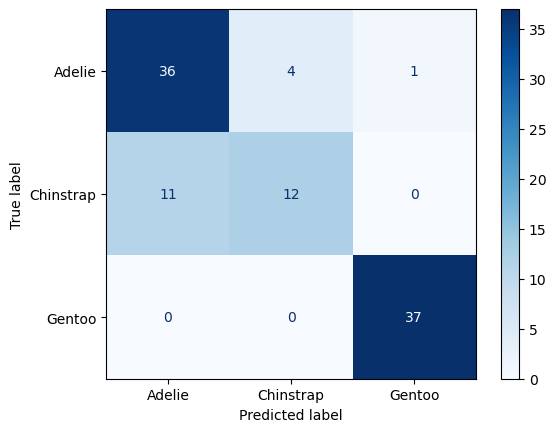

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues')